<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/relationship_in_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving divorce.csv to divorce.csv


In [ ]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv("/content/divorce.csv",parse_dates=["divorce_date","dob_man","dob_woman","marriage_date"])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


Nice work parsing those dates at the same time as you imported the data into pandas.

In [ ]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

you're set up to look at how a couple's marriage date is related to other data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

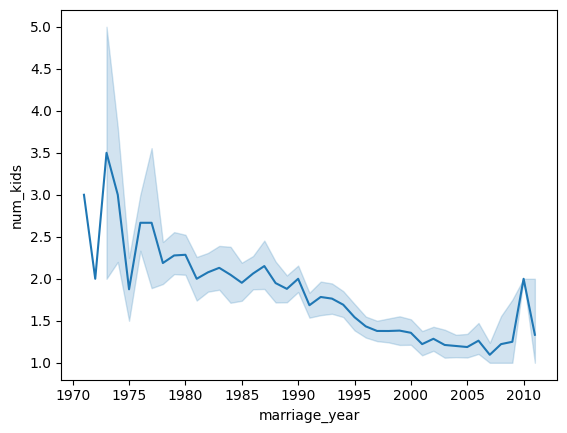

In [ ]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce,x="marriage_year",y="num_kids")
plt.show()

You've discovered a pattern here: it looks like couples who had later marriage years also had fewer children during their marriage.

### 3.2. **Correlation**

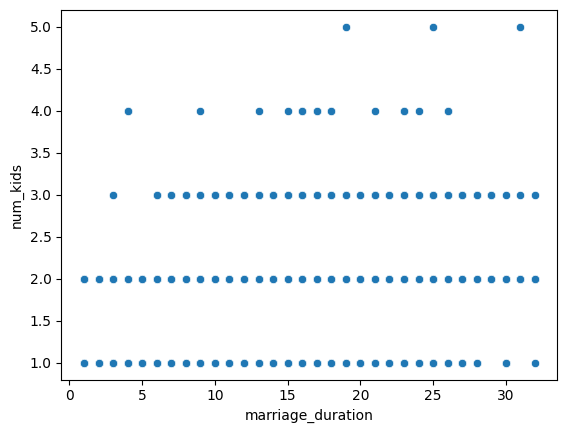

In [ ]:
# Create the scatterplot
sns.scatterplot(x="marriage_duration",y="num_kids",data=divorce)
plt.show()

There is a slight positive relationship in your scatterplot. In the dataset, couples with no children have no value in the num_kids column. If you are confident that all or most of the missing values in num_kids are related to couples without children, you could consider updating these values to 0, which might increase the correlation.

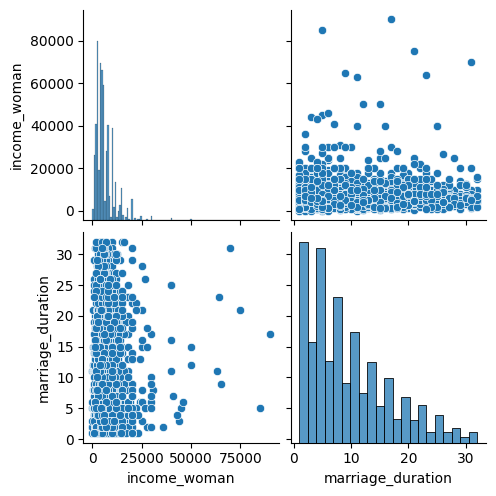

In [ ]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce,vars=["income_woman","marriage_duration"])
plt.show()

Just as in the correlation matrix, you can see that the relationship between income_woman and marriage_duration is not a strong one. You can also get a sense of the distributions of both variables in the upper left and lower right plots.

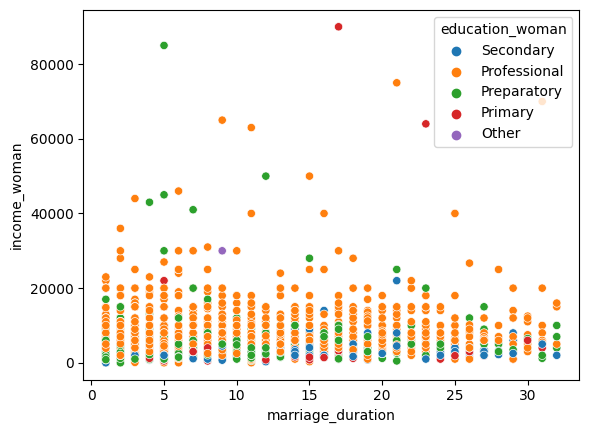

In [ ]:
# Create the scatter plot
sns.scatterplot(data = divorce,x="marriage_duration",y="income_woman",hue="education_woman")
plt.show()

it looks like there is a positive correlation between professional education and higher salaries, as you might expect. The relationship between women's age at marriage and education level is a little less clear.

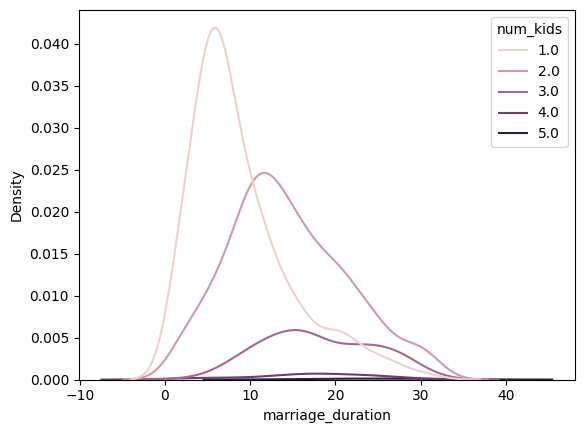

In [ ]:
# Create the KDE plot
sns.kdeplot(data=divorce,x="marriage_duration",hue="num_kids")
plt.show()

on va ajouter cut = 0 pck il n'existe pas une marrige duration égal à 0

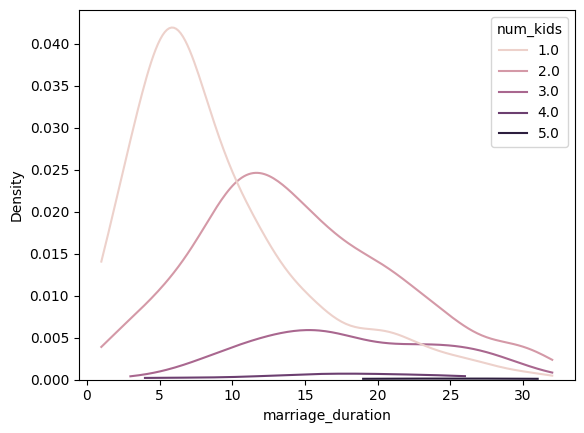

In [ ]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

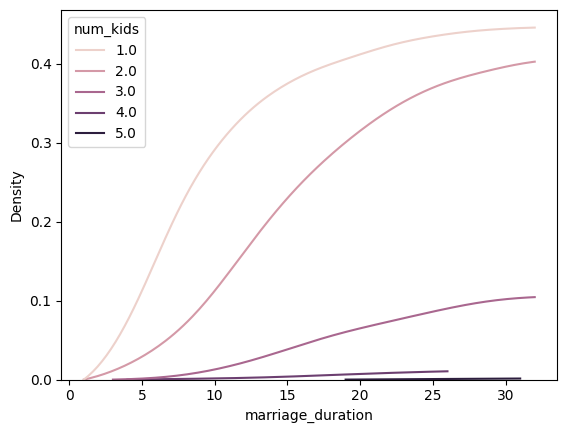

In [ ]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

It looks as though there is a positive correlation between longer marriages and more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable our findings are.